# HW01 — ChBE 413
**Name:** Mikkel Flores  
**Due Date:** September 4, 2025


# Question 1

Along with Chemical Engineering, I am pursuing a minor in Statistics, and after talking to my advisor I was able to substitute ChBE 413 as one of my 400 level technical electives for the Stat minor. I was first exposed to data science and machine learning at my internship at Fauske & Associates, where I had the opportunity to develop a computer vision model to characterize nuclear waste which will help inform waste remediation strategies. Additionally, I was interested in the kinetic fitting models the other interns were able to work on. In my exit interview, I recognized the major growth opportunity in our Combustible Dust Hazards department, where there is no shortage of testing data and reports. I had the idea of creating a predictive model to estimate the explosibility parameters of combustible dusts based on their material and physical properties. The intended benefit is to support the expansion of the department by using the model to accelerate testing and client reporting turnover. I believe this class will help me get closer to that goal by complimenting the skillset I already have and the work in Process Safety that I am passionate about.

# Question 2

**Part a**

In [44]:
def ReadToDict(filename):
    MWDict = {}
    FormulaDict = {}

    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split("\t")
            parts = [p for p in parts if p != ""]

            if len(parts) < 3:
                continue

            name, mw_str, formula = parts[-3], parts[-2], parts[-1]

            mw_str = mw_str.replace(" g/mol", "").strip()

            try:
                mw = float(mw_str)
            except ValueError:
                continue

            MWDict[name] = mw
            FormulaDict[name] = formula
            
    return [MWDict, FormulaDict]

In [45]:
MWDict, FormulaDict = ReadToDict("ChemicalNames.txt")

print("Total entries:", len(MWDict))
for i, (name, mw) in enumerate(MWDict.items()):
    if i >= 10:
        break
    formula = FormulaDict.get(name, "N/A")
    print(f"{name}: {mw} g/mol | formula: {FormulaDict[name]}")

Total entries: 132
Acetic acid: 60.052 g/mol | formula: CH3COOH
Hydrochloric acid: 36.458 g/mol | formula: HCl
Sulfuric acid: 98.072 g/mol | formula: H2SO4
Acetate: 59.044 g/mol | formula: CH3COO–
Ammonia: 17.031 g/mol | formula: NH3
Nitric acid: 63.012 g/mol | formula: HNO3
Phosphoric acid: 97.994 g/mol | formula: H3PO4
Sodium phosphate: 119.976 g/mol | formula: Na3PO4
Calcium carbonate: 100.086 g/mol | formula: CaCO3
Ammonium sulfate: 132.134 g/mol | formula: (NH4)2SO4


Debugging

In [46]:
with open("ChemicalNames.txt", 'r') as f:
    for i, line in enumerate(f):
        print(repr(line))
        if i > 5:
            break

'1\tAcetic acid\t60.052 g/mol\tCH3COOH\n'
'2\tHydrochloric acid\t36.458 g/mol\tHCl\n'
'3\tSulfuric acid\t98.072 g/mol\tH2SO4\n'
'4\tAcetate\t59.044 g/mol\tCH3COO–\n'
'5\tAmmonia\t17.031 g/mol\tNH3\n'
'6\tNitric acid\t63.012 g/mol\tHNO3\n'
'7\tPhosphoric acid\t97.994 g/mol\tH3PO4\n'


**Part b**

In [47]:
# 1 kDa = 1000 g/mol

def ConvertMW(mw_g_per_mol):
    return mw_g_per_mol / 1000.0

In [48]:
def write_kDa_file(out_filename, MWDict, FormulaDict):
    with open(out_filename, "w") as f:
        for name, mw_g in MWDict.items():
            mw_kDa = ConvertMW(mw_g)
            formula = FormulaDict.get(name, "")
            f.write(f"{name}\t{mw_kDa:.6f} kDa\t{formula}\n")

write_kDa_file("ChemicalNames_kDa.txt", MWDict, FormulaDict)

Checking Output

In [49]:
with open("ChemicalNames_kDa.txt", "r") as f:
    for i, line in enumerate(f):
        print(repr(line))
        if i > 5:
            break

'Acetic acid\t0.060052 kDa\tCH3COOH\n'
'Hydrochloric acid\t0.036458 kDa\tHCl\n'
'Sulfuric acid\t0.098072 kDa\tH2SO4\n'
'Acetate\t0.059044 kDa\tCH3COO–\n'
'Ammonia\t0.017031 kDa\tNH3\n'
'Nitric acid\t0.063012 kDa\tHNO3\n'
'Phosphoric acid\t0.097994 kDa\tH3PO4\n'


**Part c**

In [50]:
def write_sulfur_acids(out_filename, MWDict, FormulaDict):
    with open(out_filename, "w") as f:
        for name, mw_g in MWDict.items():
            formula = FormulaDict.get(name, "")

            if "acid" in name.lower() and "S" in formula:
                mw_kDa = ConvertMW(mw_g)
                f.write(f"{name}\t{mw_kDa:.6f} kDa\t{formula}\n")

write_sulfur_acids("ChemicalNames_kDa_Sulfur_acids.txt", MWDict, FormulaDict)

Checking Output

In [51]:
with open("ChemicalNames_kDa_Sulfur_acids.txt", "r") as f:
    for i, line in enumerate(f):
        print(repr(line))
        if i > 5:
            break

'Sulfuric acid\t0.098072 kDa\tH2SO4\n'
'Sulfurous acid\t0.082073 kDa\tH2SO3\n'


**Part d**

In [52]:
import numpy as np

sulfur_mws_kDa = []

for name, mw_g in MWDict.items():
    formula = FormulaDict.get(name, "")
    if "acid" in name.lower() and "S" in formula:
        mw_kDa = ConvertMW(mw_g)
        sulfur_mws_kDa.append(mw_kDa)

sulfur_array = np.array(sulfur_mws_kDa)
print("Array of sulfur acid MWs (kDa):", sulfur_array)

Array of sulfur acid MWs (kDa): [0.098072 0.082073]


In [53]:
avg = np.mean(sulfur_array)
std = np.std(sulfur_array)

print(f"Average MW of Sulfur-containing acids (kDa): {avg:.6f}")
print(f"Standard Deviation of MW of Sulfur-containing acids (kDa): {std:.6f}")

Average MW of Sulfur-containing acids (kDa): 0.090072
Standard Deviation of MW of Sulfur-containing acids (kDa): 0.008000


**Part e**

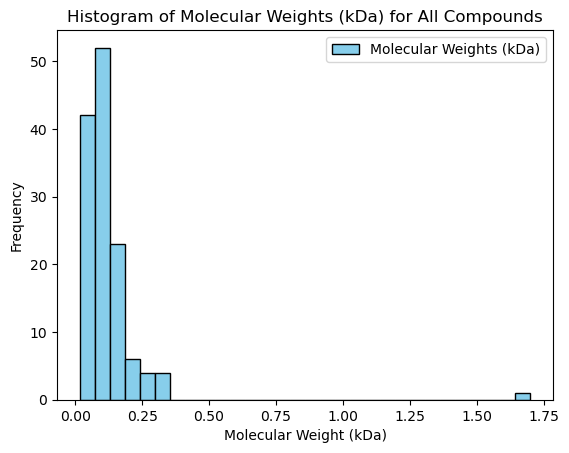

In [54]:
import matplotlib.pyplot as plt

mw_kDa_all = [ConvertMW(mw_g) for mw_g in MWDict.values()]

plt.hist(mw_kDa_all, bins=30, color="skyblue", edgecolor="black", label="Molecular Weights (kDa)")
plt.title("Histogram of Molecular Weights (kDa) for All Compounds")
plt.xlabel("Molecular Weight (kDa)")
plt.ylabel("Frequency")
plt.legend()

plt.show()